In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io
from utils import *

In [3]:
X_train, y_train, X_test = load()

In [4]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
X_train.shape

(60000, 784)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
X_train.shape, y_train.shape, X_test.shape

((60000, 784), (60000,), (10000, 784))

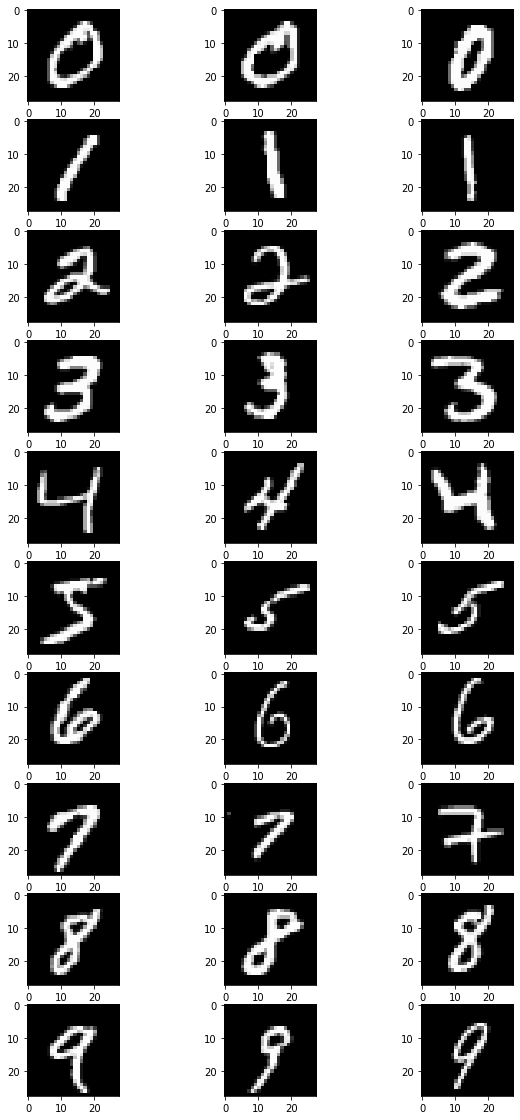

In [13]:
fig, axes = plt.subplots(10, 3, figsize = (10, 20))
for digit in range(10):
    ax_row = axes[digit]
    for i in range(3):
        image = X_train[y_train == digit][i]
        ax = ax_row[i]
        ax.imshow(image.reshape(28, 28), cmap = 'gray', vmin = 0, vmax = 255)

In [15]:
X_train, X_test = standardize(X_train, X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_model = LogisticRegression(multi_class = 'ovr')
logistic_model.fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression(multi_class='ovr')

In [24]:
yhat_train = logistic_model.predict(X_train)
yhat_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 5, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 0, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [26]:
np.mean(yhat_train == y_train)

0.9314333333333333

In [27]:
from sklearn.model_selection import KFold

kfold = KFold(3)

accuracies = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_train = X_train[train_idx]
    X_train_val = X_train[val_idx]
    y_train_train = y_train[train_idx]
    y_train_val = y_train[val_idx]
    
    model = LogisticRegression(multi_class = 'ovr')
    model.fit(X_train_train, y_train_train)
    
    val_acc = np.mean(model.predict(X_train_val) == y_train_val)
    print(val_acc)
    accuracies.append(val_acc)

np.mean(accuracies)    

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.909


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9096


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9121


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9102333333333333

In [28]:
yhat_test = logistic_model.predict(X_test)
results_to_csv(yhat_test, 'kaggle_logistic.csv')

In [1]:
from sklearn.tree import DecisionTreeClassifier
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train, y_train, X_test = load()
X_train, X_test = standardize(X_train, X_test)

In [3]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 100)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [5]:
yhat_train = decision_tree.predict(X_train)
yhat_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [6]:
np.mean(yhat_train == y_train)

1.0

In [7]:
from sklearn.model_selection import KFold

kfold = KFold(3)

accuracies = []

for train_idx, val_idx in kfold.split(X_train):
    X_train_train = X_train[train_idx]
    X_train_val = X_train[val_idx]
    y_train_train = y_train[train_idx]
    y_train_val = y_train[val_idx]
    
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 100)
    model.fit(X_train_train, y_train_train)
    
    val_acc = np.mean(model.predict(X_train_val) == y_train_val)
    print(val_acc)
    accuracies.append(val_acc)

np.mean(accuracies)    

0.86935
0.86445
0.8774


0.8704000000000001

In [8]:
yhat_test = decision_tree.predict(X_test)
results_to_csv(yhat_test, 'kaggle_decisiontree.csv')

In [1]:
from sklearn.ensemble import RandomForestClassifier
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train, y_train, X_test = load()
X_train, X_test = standardize(X_train, X_test)

In [3]:
random_forest = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=100)

In [5]:
yhat_train = random_forest.predict(X_train)
yhat_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [6]:
np.mean(yhat_train == y_train)

0.9999833333333333

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(3)

accuracies = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_train = X_train[train_idx]
    X_train_val = X_train[val_idx]
    y_train_train = y_train[train_idx]
    y_train_val = y_train[val_idx]
    
    model = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 100)
    model.fit(X_train_train, y_train_train)
    
    val_acc = np.mean(model.predict(X_train_val) == y_train_val)
    print(val_acc)
    accuracies.append(val_acc)

np.mean(accuracies)    

0.9565
0.9541
0.9555


0.9553666666666668

In [9]:
yhat_test = random_forest.predict(X_test)
results_to_csv(yhat_test, 'kaggle_randomforest.csv')

In [10]:
from sklearn.decomposition import PCA
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
X_train, y_train, X_test = load()
X_train, X_test = standardize(X_train, X_test)

In [12]:
pca = PCA(n_components = 2)
pca.fit(X_train)
pcs = pca.transform(X_train)

<AxesSubplot:>

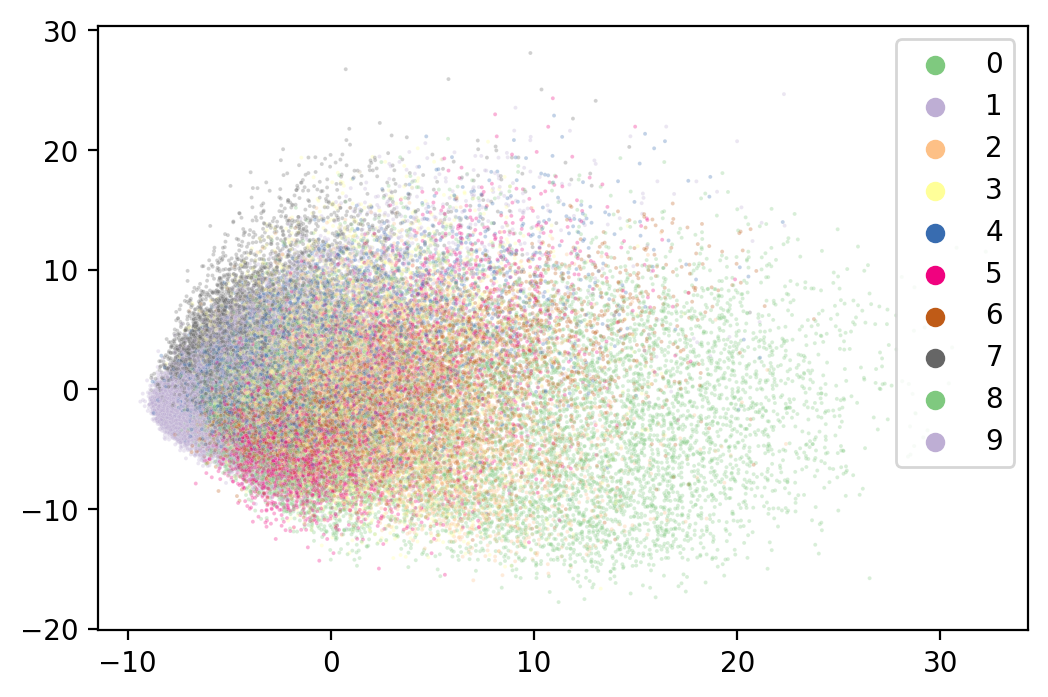

In [13]:
plt.figure(figsize = (6,4), dpi = 200)
sns.color_palette('Accent')
sns.scatterplot(x = pcs[:,0], y = pcs[:,1], hue = y_train, s = 2, alpha = .3, palette = 'Accent')